In [7]:
import os
import numpy as np
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy import wcs
import sys
import os.path
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mycube="Cube_0013_Grouped/Orion_I_013_Continuum.fits"

In [9]:
datacube = fits.open(mycube)
data = datacube[0].data
header = datacube[0].header
cube = data[:,:,:]

In [18]:
number_list=[]

for x in range(0, 100):
    rms_number_x = np.nanstd(cube[:,x:x+1,400:700,400:700])
    #print rms_number_x
    number_list.append(rms_number_x)
print len(number_list)

100


In [19]:
rp = datacube[0].header['CRPIX3']
rf = datacube[0].header['CRVAL3']
df = datacube[0].header['CDELT3']
nf = datacube[0].header['NAXIS3']
xvals = rf + df*(np.arange(nf)-rp)
xvals=xvals*10**-6
#xvals=round(xvals),2)
print len(xvals)

100


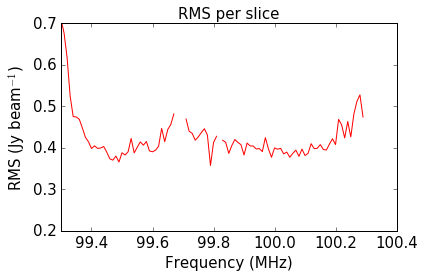

In [55]:
plt.plot(xvals,number_list, "r-")
plt.title("RMS per slice", fontsize=15)
plt.xlabel("Frequency (MHz)", fontsize=15)
plt.ylabel("RMS (Jy beam$^{-1}$)",fontsize=15)
plt.xlim(99.3,100.4)
plt.ylim(0.2,0.7)
plt.yticks(size=15)
plt.xticks(size=15)
plt.tight_layout()
plt.savefig("rms_cube_plotaddfreq.png",pad_inches=0.5)